# Sales Prediction Using Machine Learning

## Importing Libraries and reading the data

In [83]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [84]:
# filter warnings

warnings.filterwarnings('ignore')

In [85]:
# read the data

data = pd.read_csv('dataset/train.csv')

In [86]:
# display 5 random rows

data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5884,FDR25,17.000,Regular,0.139522,Canned,266.8884,OUT046,1997,Small,Tier 1,Supermarket Type1,5034.7796
5093,DRF36,16.100,Low Fat,0.039464,Soft Drinks,189.9846,OUT010,1998,NaN,Tier 3,Grocery Store,191.0846
7685,FDA58,9.395,Low Fat,0.103751,Snack Foods,235.8932,OUT046,1997,Small,Tier 1,Supermarket Type1,942.7728
5170,FDY20,12.500,Regular,0.081880,Fruits and Vegetables,91.7488,OUT049,1999,Medium,Tier 1,Supermarket Type1,1358.2320
7552,FDA47,10.500,Regular,0.117334,Baking Goods,164.1210,OUT017,2007,NaN,Tier 2,Supermarket Type1,2773.0570


## Finding the Number of Rows and Columns of the Dataset

In [87]:
# find the shape

data.shape

(8523, 12)

## Get info about the dataset

In [88]:
# describe the data
 
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Checking for null values 

In [89]:
# check for null values

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [90]:
# finding percentage of missing values

# isnull() returns a dataframe with True and False values

# if missing value percentages were below 5 it would be okay to drop them

data.isnull().sum() * 100 / len(data)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<mark>Here we can see that Item_weight Column has 1463 (17%) empty values, and Outlet_Size has 2410 (28%) empty values.</mark>

## Duplicate Values

In [91]:
# duplicate values

# .duplicate() returns a boolean series denoting duplicate rows

data.duplicated().any()

False

<mark>There are no duplicate rows in the dataset</mark>

## Handling the missing values

### Item_Weight

- Two main methods to handle missing values for numerical data, univariate and multivariate imputation

- Univariate imputation is filling missing values with the column containing the missing values, for example mean, median, mode etc.

- Multivariate imputation is filling missing values with the other columns as well as the column containing the missing values, for example regression, KNN, ML etc.

#### Univariate Imputation

In [92]:
# Item_Weight Missing Values

mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

print(mean_weight,median_weight)

12.857645184135976 12.6


In [93]:
# filling missing values with mean

data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(median_weight)

In [94]:
# display the data

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


##### Finding Variance

- variance is the spread or distance of data points from the mean

- variance decreases after mean imputation

- these changes should not result in a significant difference in variance

In [95]:
# finding the variance

print('Original Variance: ', data['Item_Weight'].var())
print('Variance after mean imputation: ', data['Item_Weight_mean'].var())
print('Variance after median imputation: ', data['Item_Weight_median'].var())

Original Variance:  21.56168825983637
Variance after mean imputation:  17.860121735060453
Variance after median imputation:  17.869561454073366


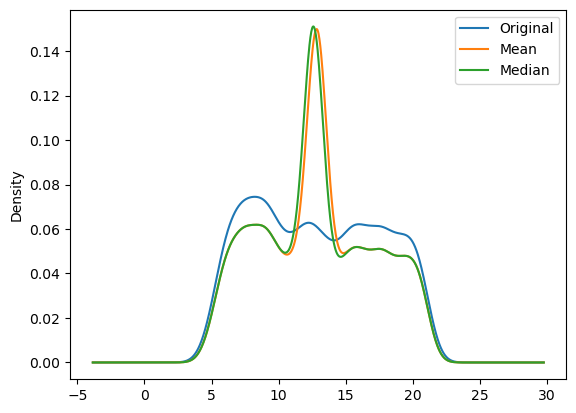

In [96]:
# distribution of Item_Weight column and its mean and median imputed versions

# KDE plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable.

data["Item_Weight"].plot(kind='kde', label='Original')
data["Item_Weight_mean"].plot(kind='kde', label='Mean')
data["Item_Weight_median"].plot(kind='kde', label='Median')

plt.legend()
plt.show()

<Axes: >

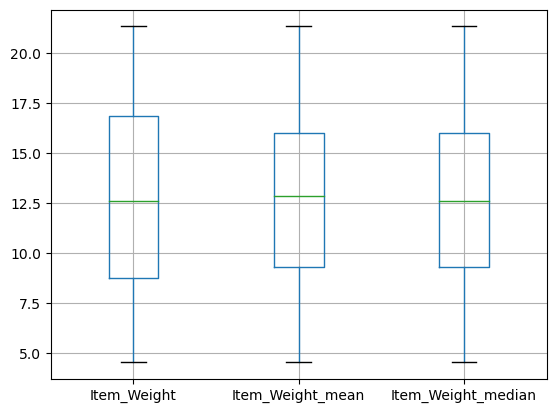

In [97]:
# box plot for Item_Weight, Item_Weight_mean, and Item_Weight_median

data[['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median']].boxplot()

<mark>After doing the imputation data distribution has been altered, we can see that most values are clustered around the mean/median, this is not desirable</mark>

In [98]:
# Fill in missing values with interpolate pandas method

# linear interpolation is a method of curve fitting using linear polynomials to construct new data points within the range of a discrete set of known data points, it estimates the missing values by drawing a straight line between 2 neighboring values and filling the missing values with the values along that line.

data['Item_Weight_interpolate'] = data['Item_Weight'].interpolate(method='linear')

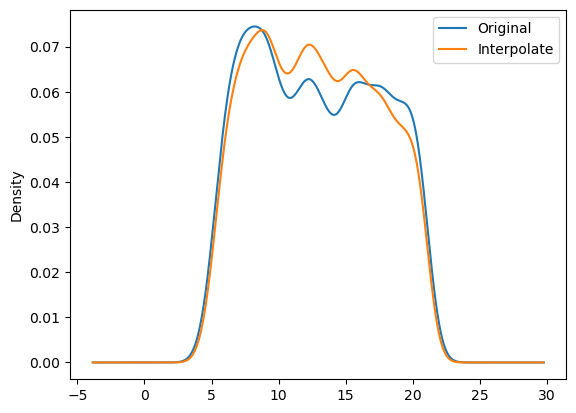

In [99]:
# plot distribution of Item_Weight and Item_Weight_interpolate

data["Item_Weight"].plot(kind='kde', label='Original')
data["Item_Weight_interpolate"].plot(kind='kde', label='Interpolate')

plt.legend()
plt.show()

#### Multivariate Imputation

- K-Nearest Neighbors Imputation to fill in missing values

In [100]:
# import KNNImputer

from sklearn.impute import KNNImputer

In [101]:
# create an instance of KNNImputer

knn = KNNImputer(n_neighbors = 10, weights="distance")

In [102]:
# fit into knn_imputer column

data['knn_imputer'] = knn.fit_transform(data[["Item_Weight"]]).ravel()

# the fit_transform method expects the input to be a 2D array, thus you use double square brackets to select the column
# the ravel method is used to convert the 2D array to a 1D array

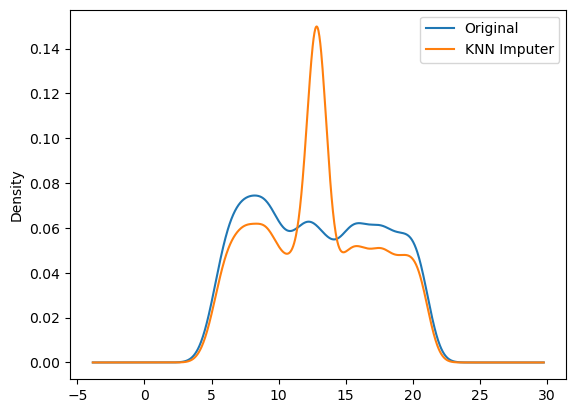

In [103]:
# plot variance for Item_Weight and knn_imputer

data["Item_Weight"].plot(kind='kde', label='Original')
data["knn_imputer"].plot(kind='kde', label='KNN Imputer')

plt.legend()
plt.show()

<mark>KNN Imputation also clusters its missing values around the mean, thus we can say that the preferred method for filling in missing values for Item_weights is linear interpolation, we can then remove the other columns and keep only our linear interpolation column</mark>

In [104]:
# remove the other columns

data = data.drop(['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median', 'knn_imputer'], axis = 1)

# axis = 1 means column
# axis = 0 means row

In [105]:
# display data

data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


### Outlet_Size

- since Outlet_Size is categorical data, we cannot use mean or median to fill in our missing values. We have to use the mode (most frequently occuring)

- but for this dataset, we can use the Outlet_Type column to fill in our missing values for Outlet_Size 

In [106]:
# value counts for Outlet_Size

data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [107]:
# value counts for Outlet_Type

data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [108]:
# find the mode of Outlet_Size for each Outlet_Type

mode_outlet = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

# fill missing values in Outlet_Size with the mode of Outlet_Size for each Outlet_Type
# aggfunc=(lambda x: x.mode()[0]) returns the mode of the Outlet_Size for each Outlet_Type, the 0 index is used to get the first value of the mode, if there are multiple modes

In [109]:
# fill missing values in Outlet_Size with the mode of Outlet_Size for each Outlet_Type

missing_values = data['Outlet_Size'].isnull()

missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [110]:
# fill in the values

data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_outlet[x])

In [111]:
# check missing values

data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

## Cleaning the Attributes

### Item_Fat_Content

In [112]:
# Item_Fat_Content column

data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<mark> The column has four categories, but really only needs 2, as they are repeating.</mark>

In [113]:
# replace LF, low fat with Low Fat and reg with Regular

data['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}, inplace = True)

In [114]:
# check the values in Item_Fat_Content column

data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<mark>We now have two categories: Low Fat and Regular</mark>

### Item_Visibility

In [115]:
# Item_Visibility column

data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

<mark>We replace the 0 values with NaN, as the Item_Visibility column cannot have 0 values, it is not possible for an item to have 0 visibility</mark>

In [116]:
# handle 0 values in Item_Visibility column

data['Item_Visibility'] = data['Item_Visibility'].replace(0, np.nan)

In [117]:
# filling in the missing values

data['Item_Visibility_interpolate'] = data['Item_Visibility'].interpolate(method='linear')

In [118]:
# Item_Visibility_interpolate Column

data['Item_Visibility_interpolate'].value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility_interpolate, Length: 8405, dtype: int64

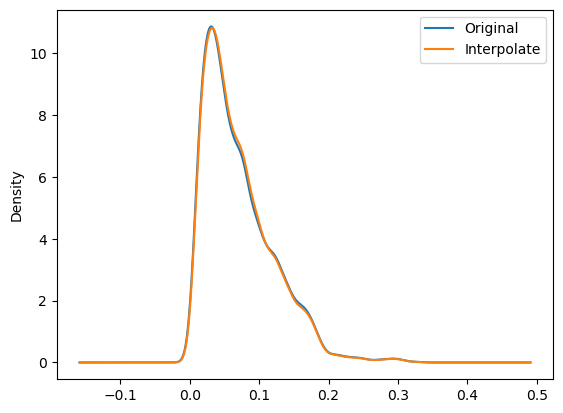

In [119]:
# plot distribution of Item_Visibility and Item_Visibility_interpolate

data["Item_Visibility"].plot(kind='kde', label='Original')
data["Item_Visibility_interpolate"].plot(kind='kde', label='Interpolate')

plt.legend()
plt.show()

In [120]:
# drop the original Item_Visibility column

data = data.drop(['Item_Visibility'], axis = 1)

### Item_Type

In [121]:
# Item_Type column

data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<mark>There is no need to clean as the column as it is already clean</mark>

### Item_Identifier

In [122]:
# Item_Identifier column

data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

<mark>We can see that the first two letters indicate the type of product, eg FD: Food, DR: Drinks, and NC: Non Consumables, thus we can create a column with just those 2 letters</mark>

In [123]:
# get the first 2 characters of Item_Identifier

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[:2])

In [124]:
# check the values in Item_Identifier column

data['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

### Outlet_Establishment_year

In [125]:
# Outlet_Establishment_Year column

data["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

<mark>we can create a new column to find the age of the store</mark>

In [126]:
# import datetime module

import datetime as dt

In [127]:
# get the current year

current_year = dt.datetime.now().year

In [128]:
# display year

current_year

2024

In [129]:
# create a new column Outlet_Age to calculate the age of the outlet

data['Outlet_Age'] = current_year - data['Outlet_Establishment_Year']

In [130]:
# drop the original Outlet_Establishment_Year column

data = data.drop(['Outlet_Establishment_Year'], axis = 1)

In [131]:
# show head

data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_Age
0,FD,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,Low Fat,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,Low Fat,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


## Handling Categorical Columns

- ML algorithms can only understand numerical values, so categorical data needs to be tranformed into numerical data
- Thus we need to do Categorical data encoding using ordinal encoding
- ordinal encoding is a way to assign unique numerical values to each category
- labelEncoder is not used here as its used to encode target labels

In [132]:
# import ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

In [133]:
# create a copy of the data

data_encoded = data.copy()

In [134]:
# select data types that are objects

# To select strings you must use the object dtype, but note that this will return all object dtype columns

cat_cols = data.select_dtypes(include=['object']).columns

In [135]:
# for loop to encode the categorical columns

for col in cat_cols:
    # create an instance of ordinal encoder
    ordinal_encoder = OrdinalEncoder()
    # fit and transform the data
    data_encoded[col] = ordinal_encoder.fit_transform(data_encoded[[col]])

# display the categories

print(ordinal_encoder.categories_)

[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [136]:
# data after encoding

data_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,37


In [137]:
# store independent and dependent variables into X and Y

X = data_encoded.drop('Item_Outlet_Sales', axis = 1)
Y = data_encoded['Item_Outlet_Sales']

In [138]:
# print X

X

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,37
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,6.865,0.056783,37
8519,1.0,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,8.380,0.046982,22
8520,2.0,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,10.600,0.035186,20
8521,1.0,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,7.210,0.145221,15


In [139]:
# print Y

Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## Regression

- if a variable can take any value between its minimum and maximum value, then it is called a continuous variable

- since we are dealing with a continuous target variable, this makes it a regression problem

- we are using two models, random forest and extreme gradient boosting random forest (XGBRFR) regressors

- random forest combines the output of multiple decision trees to reach a single result

- XGBRFR is an optimized version of random forests that uses gradient boosting techniques to enhance model performance, focusing on both speed and accuracy.

- Random Forest builds trees independently and averages their predictions, while XGB Random Forest uses gradient boosting, sequentially building trees that correct errors from previous ones.

### Random Forest Regressor

In [140]:
# import random forest regressor

from sklearn.ensemble import RandomForestRegressor

# import cross_val_score

from sklearn.model_selection import cross_val_score

In [141]:
# create instance of random forest regressor

# the 100 and 42 are hyperparameters that represent the number of trees in the forest and the random state respectively

rf = RandomForestRegressor(n_estimators=100,random_state=42)

In [142]:
# cross validation

# cv is the number of folds

scores = cross_val_score(rf, X, Y, cv = 5, scoring = 'r2')

In [143]:
# print scores

print(scores.mean())

0.5551321920224384


### XGBRF Regressor

In [144]:
# import XGBRegressor

from xgboost import XGBRFRegressor

In [145]:
# create instance of XGBRegressor

xg = XGBRFRegressor(n_estimators=100, random_state=42)

In [146]:
# cross validation

scores = cross_val_score(xg, X, Y, cv = 5, scoring = 'r2')

In [147]:
# print scores

print(scores.mean())

0.5954521443965901


<mark> from this result, which is closer to 1, we can see that XGBRF model is better</mark>

## XGBRF Feature Importance

In [148]:
# feature importance

xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,Y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.455383
10,Outlet_Age,0.173210
3,Item_MRP,0.156619
4,Outlet_Identifier,0.110316
5,Outlet_Size,0.082590
6,Outlet_Location_Type,0.012651
9,Item_Visibility_interpolate,0.002966
8,Item_Weight_interpolate,0.002570
2,Item_Type,0.001875
0,Item_Identifier,0.001224


<mark> 
we are going to consider the first 5 features only, which are:
</mark>

- Outlet_Type	
- Outlet_Age
- Item_MRP
- Outlet_Identifier
- Outlet_Size

In [149]:
# list of columns to drop Outlet_Location_Type, Item_Visibility_interpolate, Item_Weight_interpolate, Item_Type, Item_Identifier, Item_Fat_Content

['Outlet_Location_Type', 'Item_Visibility_interpolate', 'Item_Weight_interpolate', 'Item_Type', 'Item_Identifier', 'Item_Fat_Content']

['Outlet_Location_Type',
 'Item_Visibility_interpolate',
 'Item_Weight_interpolate',
 'Item_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [150]:
# new scores

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Outlet_Location_Type', 'Item_Visibility_interpolate', 'Item_Weight_interpolate', 'Item_Type', 'Item_Identifier', 'Item_Fat_Content'],axis=1),Y,cv=5,scoring='r2')

In [151]:
# print scores

print(scores.mean())

0.5964214495269795


In [152]:
# create the final dataframe

final_data = X.drop(['Outlet_Location_Type', 'Item_Visibility_interpolate', 'Item_Weight_interpolate', 'Item_Type', 'Item_Identifier', 'Item_Fat_Content'], axis = 1)

In [153]:
# display the final data

final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


## Best Model

In [154]:
# create instance of final XGBRFRegressor

xg_final = XGBRFRegressor()

In [155]:
# fit the model

xg_final.fit(final_data,Y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [156]:
# check MAE (Mean Absolute Error)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [157]:
# train test split

X_train, X_test, Y_train, Y_test = train_test_split(final_data, Y, test_size = 0.2, random_state = 42)

In [158]:
# fit the model

xg_final.fit(X_train, Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [159]:
# predict on the test set

Y_pred = xg_final.predict(X_test)

In [160]:
# mean absolute error

mae = mean_absolute_error(Y_test, Y_pred)

In [161]:
# print mae

print(mae)

713.5643497364571


<mark> on average the absolute difference between the predicted values and actual values is 713.56, this suggest that the model is off by 713.56 units from the actual value</mark>

## Predict on Unseen Data

In [162]:
# predict

pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]

In [163]:
# print the prediction, and the ranges it can be in

print(f'The prediction can be in the range of {pred - mae} to {pred + mae}')

The prediction can be in the range of 1339.2945369822928 to 2766.423236455207
